# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data = data.reset_index(drop=True)
pd.set_option('display.max_columns', None)
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

В столбце parks_around3000 и ponds_around3000, одинаковое количество пропусков, выглядит подозрительно.

In [4]:
data.isna().sum()
# посмотрел сколько пропусков в столбцах.

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

In [5]:
for col in data.columns:
    print(f'{col}: {data[col].isna().sum() / data.shape[0] * 100:.2f}%')
# посчитал процент отсутствующих значений по каждой колонке.

total_images: 0.00%
last_price: 0.00%
total_area: 0.00%
first_day_exposition: 0.00%
rooms: 0.00%
ceiling_height: 38.80%
floors_total: 0.36%
living_area: 8.03%
floor: 0.00%
is_apartment: 88.29%
studio: 0.00%
open_plan: 0.00%
kitchen_area: 9.61%
balcony: 48.61%
locality_name: 0.21%
airports_nearest: 23.38%
cityCenters_nearest: 23.29%
parks_around3000: 23.28%
parks_nearest: 65.91%
ponds_around3000: 23.28%
ponds_nearest: 61.56%
days_exposition: 13.42%


<AxesSubplot:>

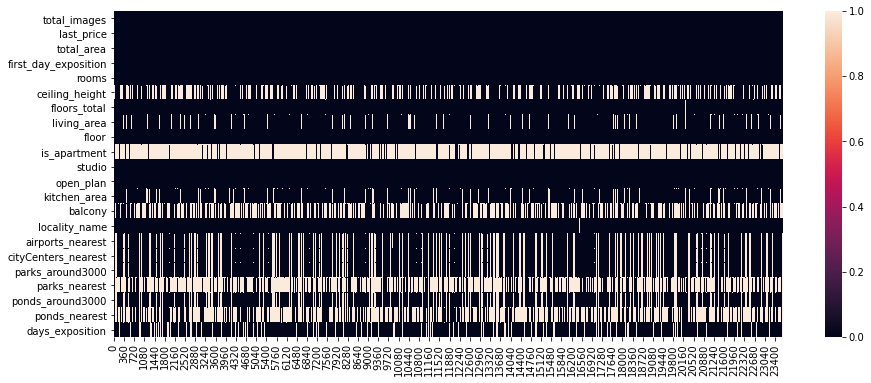

In [6]:
plt.figure(figsize=(15, 6))
sns.heatmap(data.isna().transpose())
# Построил хитмап, по пропущенным значениям.

#### Оценка данных:
- Высота потолков: пропущено 38,8% значений, при этом часть значений были введены вручную с ошибкой (27 м вместо 2,7 м и т.д.).  
- Число этажей в доме: пропущено 0,4% значений.  
- Жилая площадь и площадь кухни: пропущено 7,9% и 9,4% значений соответственно. Была построена зависимость на основе гипотезы, что если нам известна общая площадь недвижимости, то мы можем оценить, сколько квадратных метров составляет жилая площадь и площадь кухни на основе уже заполненных пользователями данных.  
- Число балконов: пропущено 48,6% значений. Предполагается, что отсутствие числа балконов свидетельствует о том, что число балконов равно нулю.  
- Название населенного пункта: пропущено 0,2% значений. Все строки с пропущенными значениями будут удалены, так как этот признак будет использоваться при дальнейшем анализе.  
- Расстояние до центра города: пропущено 23,3% значений. Поскольку трудоемкость заполнения таких пропущенных значений велика по сравнению с их общим количеством, оставим данные пропущенные значения без изменений.  
- Апартаменты будут заполнены 0, показывая их отсутствие.   
- Расстояние до ближайшего аэропорта, число парков в радиусе 3 км, расстояние до ближайшего парка, число водоемов в радиусе 3 км, расстояние до ближайшего водоема: пропущенные значения в этих признаках оставим без изменений, так как они не будут использованы в текущем исследовании.  
- Длительность размещения объявления: пропущено 13,5% значений. Все пропущенные значения будут заменены на медиану.

В таблице очень много отсутствующих данных, но больше всего в столбце is_apartment

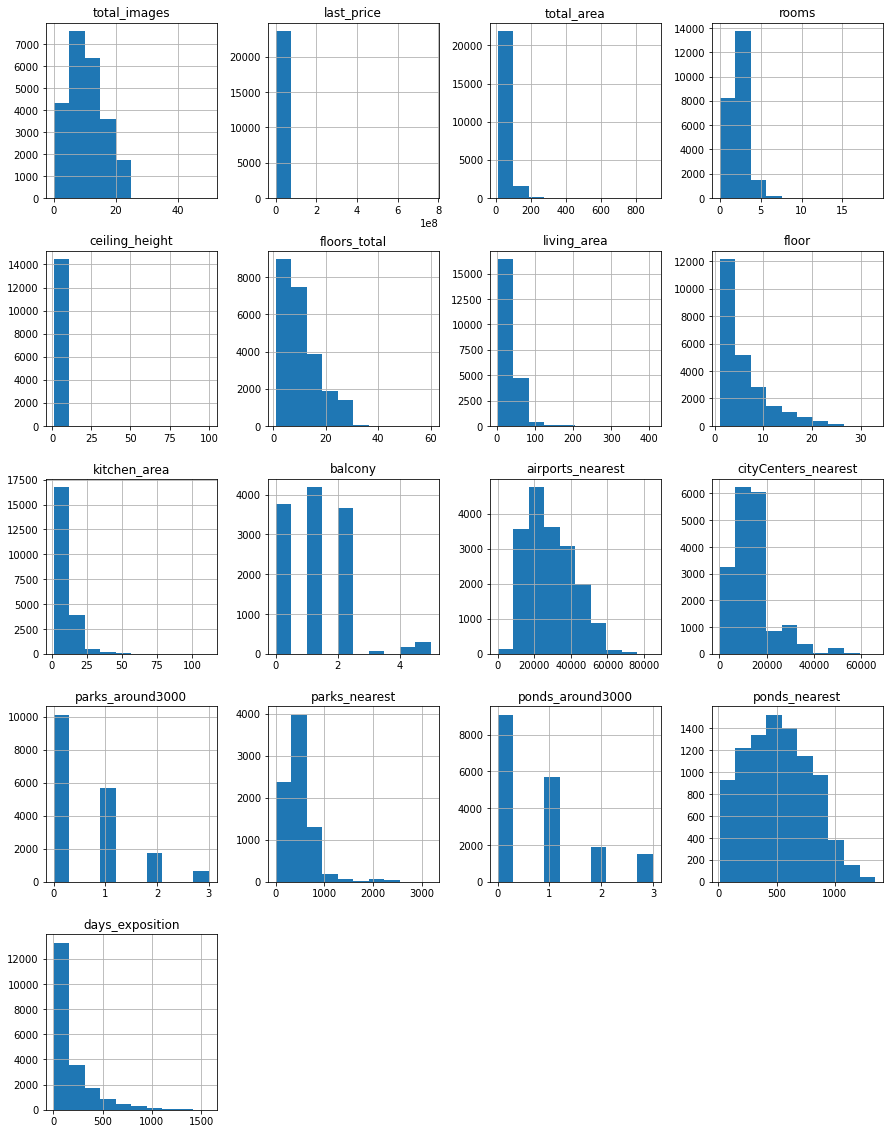

In [7]:
data.hist(figsize=(15, 20))
plt.show()
# Создал гистограмму по каждому столбцу в таблице.

In [8]:
# изменим тип данных.
data['last_price'] = data['last_price'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  int64  
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Предобработка данных

Очень много столбцов с пропущенными значениями, нужно выяснить что это за пропуски.

In [9]:
# проверим на явные дубликаты.
data.duplicated().sum()

0

In [10]:
good_data = data.query('last_price <= 100000000').reset_index(drop=True)
# Избавимся от аномальных значений.

#### Предобработка данных столбца first_day_exposition

Преобразуем данные в столбце first_day_exposition в формат datetime64.

In [11]:
data['first_day_exposition'] = (
    pd.to_datetime(data['first_day_exposition'],
                   format='%Y-%m-%dT%H:%M:%S')
)

In [12]:
# Проверю как все сработало.
#data.head()
#data.info()

#### Предобработка данных столбца ceiling_height

В столбце ceiling_height есть аномальные данные

<AxesSubplot:>

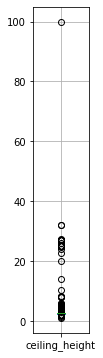

In [13]:
#data.boxplot(column='ceiling_height', grid=True, figsize=(1, 10))
data.boxplot(column='ceiling_height', grid=True, figsize=(1, 6))

Даные в столбце высотой потолков выше 100м будем считать аномальными.

In [14]:
data = data.query('ceiling_height < 40 | ceiling_height.isna()').reset_index(drop=True)

In [15]:
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76, 25.  ,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,
        2.66,  2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,
        3.15,  3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,
        5.3 ,  5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,
        2.83,  4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,
        3.35,  2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,
        3.52,  3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,
        4.19,  3.24,  4.8 ,  4.5 ,  4.2 ,  3.36, 32.  ,  3.08,  3.68,
        3.07,  3.37,  3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,
        3.14,  4.37,  2.68,  3.22,  3.27, 27.  ,  4.1 ,  2.93,  3.46,
       24.  ,  3.47,

В данных с высотой потолков от 20 до 35м скорее всего пропущенна разделительная точка. 
т.е не 20м, а 2.0м. 

In [16]:
def rework_ceiling(ceiling_height_bad):
    if 20 <= ceiling_height_bad <= 40:
        return ceiling_height_bad / 10
    return ceiling_height_bad

In [17]:
data.ceiling_height = data.ceiling_height.apply(rework_ceiling).reset_index(drop=True)
data['ceiling_height'].unique()

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

<AxesSubplot:>

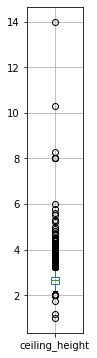

In [18]:
data.boxplot(column='ceiling_height', grid=True, figsize=(1, 6))

Данные с высотой потолка более 6 метров аномальные, так же и потолков ниже 2х не часто встречается.
Так же заполним медианой отсутствующие значения.

In [19]:
data = data.query('ceiling_height < 6 & ceiling_height > 2 | ceiling_height.isna()'
                 ).reset_index(drop=True)
# Исключаю аномальные значения.

In [20]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
# data['ceiling_height'].isna().sum()
# Заполнил отсутствующие данные медианными значениями.

In [21]:
data['ceiling_height'] = data['ceiling_height'].astype(int)

In [22]:
data['ceiling_height'].unique()

array([2, 3, 4, 5])

In [23]:
#data['ceiling_height'].isna().sum()
#data.info()

In [24]:
#data['ceiling_height'].unique()      # Проверил не остались ли аномальные значения.
#data['ceiling_height'].isna().sum()  # Проверил все ли верно сработало.

#### Предобработка данных столбца floors_total

In [25]:
# заменим пропуски и преобразуем тип данных в int
data['floors_total'] = data['floors_total'].fillna(0)
data['floors_total'].astype(int)

0        16
1        11
2         5
3        14
4        14
         ..
23671     5
23672     5
23673     3
23674    17
23675     5
Name: floors_total, Length: 23676, dtype: int64

Так как цены на квартиры в некоторых позициях очень высокие, могу предположить что есть квартиры из Москва-Сити. В данном районе самый высокое здание имеет 34 этажа. Все что выше это аномальные значения.

In [26]:
data = data.query('floors_total < 34 | floors_total.isna()').reset_index(drop=True)
# Удалил аномальные данные и заполнил пропуски медианным значением
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15.,  0., 20.,
       28., 21.,  1., 29., 33.])

In [27]:
data['floors_total'] = data['floors_total'].apply(lambda x: round(x))
# Убрал точки, округлил.
data['floors_total'].unique()

array([16, 11,  5, 14, 12, 26, 24, 27,  9,  6, 17, 25,  3, 23, 19, 18,  4,
       22,  8,  2, 10,  7, 13, 15,  0, 20, 28, 21,  1, 29, 33])

In [28]:
#data['floors_total'].unique()
#data['floors_total'].isna().sum()
#data['floors_total'].value_counts()
#data['floors_total'].mode()[0]
#display(data['floors_total'].head(10))

In [29]:
#print(data.groupby('floor')['floors_total'].count())

In [30]:
#data['floor'].value_counts()
#display(data['floors_total'].unique())
#data.isna().sum()

#### Предобработка данных столбца living_area

<AxesSubplot:>

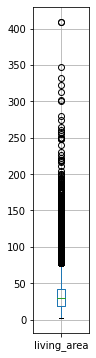

In [31]:
data.boxplot(column='living_area', grid=True, figsize=(1, 6))

В столбце living_area жилая площадь с 200м2 выглядит аномальной, исключим ее.

<AxesSubplot:>

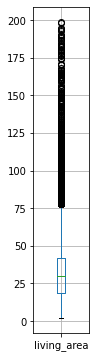

In [32]:
data = data.query('living_area < 200 | living_area.isna()').reset_index(drop=True)
# Проверю как все сработало.
data.boxplot(column='living_area', grid=True, figsize=(1, 6))

В living_area есть пропущенные значения, т.к. нам известна полная площадь total_area можно заполнить значения им.

In [33]:
# data[data['living_area'].isna()]
row = data.iloc[3]
display(row)
# Будем наблюдать за строкой с индексом 3, с living_area == NaN.

total_images                              0
last_price                         64900000
total_area                            159.0
first_day_exposition    2015-07-24 00:00:00
rooms                                     3
ceiling_height                            2
floors_total                             14
living_area                             NaN
floor                                     9
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                            NaN
balcony                                 0.0
locality_name               Санкт-Петербург
airports_nearest                    28098.0
cityCenters_nearest                  6800.0
parks_around3000                        2.0
parks_nearest                          84.0
ponds_around3000                        3.0
ponds_nearest                         234.0
days_exposition                       424.0
Name: 3, dtype: object

In [34]:
data['living_area'] = data['living_area'].fillna(data['total_area'] * 0.8)

In [35]:
# выведем нашего наблюдаемого
row = data.iloc[3]
display(row)

total_images                              0
last_price                         64900000
total_area                            159.0
first_day_exposition    2015-07-24 00:00:00
rooms                                     3
ceiling_height                            2
floors_total                             14
living_area                           127.2
floor                                     9
is_apartment                            NaN
studio                                False
open_plan                             False
kitchen_area                            NaN
balcony                                 0.0
locality_name               Санкт-Петербург
airports_nearest                    28098.0
cityCenters_nearest                  6800.0
parks_around3000                        2.0
parks_nearest                          84.0
ponds_around3000                        3.0
ponds_nearest                         234.0
days_exposition                       424.0
Name: 3, dtype: object

У нашего наблюдаемого значение living_area заполнилось, все работает корректно, можно двигаться дальше.

#### Предобработка данных столбца is_apartament

In [36]:
#data['is_apartment'].value_counts()
#data['is_apartment'].unique()

В столбце is_apartment очень много пропусков, скорее всего эти эти квартиры не являются апартаментами, и поэтому можно предположить, люди которые заполняли эту графу подумали, нет апартамента - нет данных.

In [37]:
data['is_apartment'].value_counts(dropna=False)
# Проверил сколько значений NaN.

NaN      20846
False     2719
True        48
Name: is_apartment, dtype: int64

In [38]:
data['is_apartment'] = data['is_apartment'].fillna(False)
# Перезаписал NaN на False.

In [39]:
#Для удобной работы с данными изменим их и изменим тип данных.
data['is_apartment'].replace('True', 1, inplace=True)   # 1
data['is_apartment'].replace('False', 0, inplace=True)  # 2
data['is_apartment'] = data['is_apartment'].astype(int) # 3
data['is_apartment'].value_counts()                     # 4

0    23565
1       48
Name: is_apartment, dtype: int64

Данные is_apartment имели тип object что не очень удобно при работе с ними, перезаписал данные (#1,2), изменил тип на int(#3) и проверил как все работает(#4).

У нашего наблюдаемого из row, в столбце is_apartment тоже было  NaN, посмотрим на строчку его данных и увидим все ли верно сработало.

In [40]:
row = data.iloc[3]
display(row)

total_images                              0
last_price                         64900000
total_area                            159.0
first_day_exposition    2015-07-24 00:00:00
rooms                                     3
ceiling_height                            2
floors_total                             14
living_area                           127.2
floor                                     9
is_apartment                              0
studio                                False
open_plan                             False
kitchen_area                            NaN
balcony                                 0.0
locality_name               Санкт-Петербург
airports_nearest                    28098.0
cityCenters_nearest                  6800.0
parks_around3000                        2.0
parks_nearest                          84.0
ponds_around3000                        3.0
ponds_nearest                         234.0
days_exposition                       424.0
Name: 3, dtype: object

In [41]:
#data.isna().sum()

#### Предобработка данных столбца kitchen_area

In [42]:
data['kitchen_area'].value_counts(dropna=False)

NaN      2268
6.00     1297
10.00    1259
8.00     1109
9.00     1101
         ... 
14.74       1
53.10       1
13.41       1
34.51       1
16.74       1
Name: kitchen_area, Length: 964, dtype: int64

Согласно рекомендациям СанПиН и ГОСТов, общая площадь кухни в жилом доме должна составлять не менее 7-9% от общей площади квартиры. Возьмем 9%.

In [43]:
kitchen_area_po_gostu = data['total_area'] * 0.09
data['kitchen_area'] = data['kitchen_area'].fillna(kitchen_area_po_gostu)
#data.info()

Опять же, у нашего наблюдаемого было значение NaN в kitchen_area, чтобы убедиться что все правильно сработало посмотрим на его строчку данных.

In [44]:
row = data.iloc[3]
display(row)

total_images                              0
last_price                         64900000
total_area                            159.0
first_day_exposition    2015-07-24 00:00:00
rooms                                     3
ceiling_height                            2
floors_total                             14
living_area                           127.2
floor                                     9
is_apartment                              0
studio                                False
open_plan                             False
kitchen_area                          14.31
balcony                                 0.0
locality_name               Санкт-Петербург
airports_nearest                    28098.0
cityCenters_nearest                  6800.0
parks_around3000                        2.0
parks_nearest                          84.0
ponds_around3000                        3.0
ponds_nearest                         234.0
days_exposition                       424.0
Name: 3, dtype: object

#### Предобработка данных столбца balcony

In [45]:
data['balcony'].value_counts(dropna=False)

NaN    11471
1.0     4185
0.0     3749
2.0     3645
5.0      300
4.0      183
3.0       80
Name: balcony, dtype: int64

Могу предположить что отсутствие значений связано с отсутствием балконов.

In [46]:
data['balcony'] = data['balcony'].fillna(0)

In [47]:
data['balcony'].value_counts(dropna=False)

0.0    15220
1.0     4185
2.0     3645
5.0      300
4.0      183
3.0       80
Name: balcony, dtype: int64

Изменим значения в столбце balcony на int.

In [48]:
data['balcony'] = data['balcony'].astype(int)
data['balcony'].value_counts(dropna=False)

0    15220
1     4185
2     3645
5      300
4      183
3       80
Name: balcony, dtype: int64

#### Предобработка данных столбца locality_name

In [49]:
#data['locality_name'].unique()

In [50]:
data['locality_name'].isna().sum()

49

Пропусков очень мало, что бы их восстановить придется обратится к специалистам которые выгружали их, но на это уйдет много времени, так что отбросим их(в таком количестве они не повлияют на ислледование).

In [51]:
data = data.dropna(subset = ['locality_name'])

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23612
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23564 non-null  int64         
 1   last_price            23564 non-null  int64         
 2   total_area            23564 non-null  float64       
 3   first_day_exposition  23564 non-null  datetime64[ns]
 4   rooms                 23564 non-null  int64         
 5   ceiling_height        23564 non-null  int64         
 6   floors_total          23564 non-null  int64         
 7   living_area           23564 non-null  float64       
 8   floor                 23564 non-null  int64         
 9   is_apartment          23564 non-null  int64         
 10  studio                23564 non-null  bool          
 11  open_plan             23564 non-null  bool          
 12  kitchen_area          23564 non-null  float64       
 13  balcony         

In [53]:
#data['locality_name'].sort_values().unique()
# заменяем поселок на посёлок через replace
# data['locality_name'] = data['locality_name'].str.replace('поселок','посёлок')

Так же в столбце locality_name присутствуют неявные дубликаты как "поселок" и "посёлок", "деревня Кудрово" и "Кудрово".

In [54]:
data['locality_name'] = data['locality_name'].apply(
    lambda title: ' '.join(word for word in title.split(' ') if not(word.islower()))
)

In [55]:
data['locality_name'].unique()

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

In [56]:
data.duplicated().sum()

0

#### Предобработка данных столбца airport_nearest

В столбце airports_nearest 5542 пропусков, заполнить мы их не можем без дополнительных иследований карт этих населенных пунктов и удалить такой большой объем нельзя, это может сказать на результатах наших исследованиях. Оставим эти данные, но заполним их нолями.

In [57]:
#data['airports_nearest'].isna().sum() 
data['airports_nearest'] = data['airports_nearest'].fillna(0)
#data['airports_nearest'].isna().sum() 
#data.info()

#### Предобработка данных столбца city_centr_nearest

In [58]:
data = data.rename(columns= {'cityCenters_nearest': 'city_centers_nearest'})
#data['cityCenters_nearest'].isna().sum()
#data['cityCenters_nearest'].value_counts(dropna=False)

Пропуски в колонке cityCenters_nearest не восстановить и заменить на нулевые значения тоже нельзя, так как это может повлиять на дальнейшие исследования, оставим все как есть.

#### Предобработка данных столбца parks_around_3000

In [59]:
#data['parks_around3000'].isna().sum()
data['parks_around3000'].value_counts(dropna=False)

0.0    10041
1.0     5656
NaN     5499
2.0     1730
3.0      638
Name: parks_around3000, dtype: int64

Данные по количеству парков мы не можем восстановить, заполним их нулевыми значениями и запишем как int.

In [60]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23612
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23564 non-null  int64         
 1   last_price            23564 non-null  int64         
 2   total_area            23564 non-null  float64       
 3   first_day_exposition  23564 non-null  datetime64[ns]
 4   rooms                 23564 non-null  int64         
 5   ceiling_height        23564 non-null  int64         
 6   floors_total          23564 non-null  int64         
 7   living_area           23564 non-null  float64       
 8   floor                 23564 non-null  int64         
 9   is_apartment          23564 non-null  int64         
 10  studio                23564 non-null  bool          
 11  open_plan             23564 non-null  bool          
 12  kitchen_area          23564 non-null  float64       
 13  balcony         

In [61]:
#data['parks_around3000'] = data['parks_around3000'].astype(int)
#data['parks_around3000'].value_counts()
# мой старый код.

In [62]:
data['parks_around3000'] = np.floor(pd.to_numeric(data['parks_around3000'], 
                                                errors='coerce')).astype('Int64')

In [63]:
# переименуем столбец
data = data.rename(columns= {'parks_around3000': 'parks_around_3000'})

#### Предобработка данных столбца parks_nearest

In [64]:
data['parks_nearest'].value_counts(dropna=False)

NaN       15536
441.0        67
392.0        41
173.0        40
456.0        40
          ...  
794.0         1
769.0         1
2555.0        1
932.0         1
792.0         1
Name: parks_nearest, Length: 992, dtype: int64

Аналогично предыдущему столбцу, заполнить данные мы не можем, из за отсутствия картографической информации. Но и нулевыми значениями не можем заполнить, оставим так как есть

#### Предобработка данных столбца ponds_around_3000

In [65]:
data['ponds_around3000'].value_counts(dropna=False)

0.0    9039
1.0    5693
NaN    5499
2.0    1879
3.0    1454
Name: ponds_around3000, dtype: int64

Если посмотреть в самое начало работы на первый вывод "data.info()", то можно увидеть у двух столбцов подозрительно одинаковое количество пропусков "parks_around3000" == 18181 и "ponds_around3000" == 18181. Так же заменим пропуски на нули и переведем в int.

In [66]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['ponds_around3000'].value_counts(dropna=False)

0    14538
1     5693
2     1879
3     1454
Name: ponds_around3000, dtype: int64

In [67]:
data = data.rename(columns= {'ponds_around3000': 'ponds_around_3000'})

#### Предобработка данных столбца ponds_nearest

In [68]:
data['ponds_nearest'].value_counts(dropna=False)

NaN       14538
427.0        70
454.0        41
153.0        40
433.0        39
          ...  
1076.0        1
1187.0        1
1337.0        1
1008.0        1
625.0         1
Name: ponds_nearest, Length: 1097, dtype: int64

Вновь не можем восстановить данные, попросим у группы инженеров работающих со сбором данных уточнить эту информацию. Так как эти данные не повлияют на наш анализ оставим все как есть.

#### Предобработка данных столбца days_exposition

In [69]:
data['days_exposition'].value_counts(dropna=False)

NaN       3164
45.0       876
60.0       538
7.0        233
30.0       208
          ... 
1064.0       1
1213.0       1
880.0        1
920.0        1
1174.0       1
Name: days_exposition, Length: 1142, dtype: int64

В данных пропущенно 13%, нулевыми значениями заполнить их нельзя, иначе получится что от публикации до снятия, объявление висело 0 дней, грубо говоря его не было, это исказить наше исследование. Присутствие значений NaN так же не дает на перевести колонку в int. Оставим данные как есть.
Посмотрим на итоговую обратоку данных.

In [70]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23564 entries, 0 to 23612
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23564 non-null  int64         
 1   last_price            23564 non-null  int64         
 2   total_area            23564 non-null  float64       
 3   first_day_exposition  23564 non-null  datetime64[ns]
 4   rooms                 23564 non-null  int64         
 5   ceiling_height        23564 non-null  int64         
 6   floors_total          23564 non-null  int64         
 7   living_area           23564 non-null  float64       
 8   floor                 23564 non-null  int64         
 9   is_apartment          23564 non-null  int64         
 10  studio                23564 non-null  bool          
 11  open_plan             23564 non-null  bool          
 12  kitchen_area          23564 non-null  float64       
 13  balcony         

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавим новый столбец с ценой одного квадратного метра

Создадим функцию которая принимает строки как аргумент, делит их, и возвращает стоимость квадратного метра.

In [71]:
def one_metr_coast(row):
    coast_quad_m = row['last_price'] / row['total_area']
    return coast_quad_m

In [72]:
data['coast_quad_m'] = data.apply(one_metr_coast, axis=1)
# применили функцию ко всем строкам датафрейма.

In [73]:
data['coast_quad_m'] = data['coast_quad_m'].round(2)
# округлил до двух знаков после запятой.

In [74]:
# data.info()
# display(data.head())
# проверил все ли верно сработало.

#### Создадим новый столбец в котором будет день недели публикации объявления

In [75]:
data['weekday_publication'] = data['first_day_exposition'].dt.weekday

In [76]:
#data.head()

#### Создадим новый столбец в котором будет месяц публикации объявления

In [77]:
data['month_publication'] = pd.DatetimeIndex(data['first_day_exposition']).month

In [78]:
#data.head()

#### Создадим новый столбец в котором будет год публикации объявления

In [79]:
data['year_publication'] = pd.DatetimeIndex(data['first_day_exposition']).year

In [80]:
#data.head()

#### Создадим новый столбец в котором будет тип этажа квартиры

In [81]:
# создадим функцию для определения типа этажа.
def floor_type(row):
    floor = row['floor']
    floors_total = row['floors_total']
    if floor == 1:
        return 'первый'
    elif floor == floors_total:
        return 'последний'
    else:
        return 'другой'

In [82]:
data['type_floor'] = data.apply(floor_type, axis=1)

In [83]:
#data.head()
#data.info()

#### Создадим новый столбец в котором будет расстояние до центра города в километрах

In [84]:
data['city_centr_km'] = data['city_centers_nearest'] / 1000
data['city_centr_km'] = data['city_centr_km'].round()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around_3000,parks_nearest,ponds_around_3000,ponds_nearest,days_exposition,coast_quad_m,weekday_publication,month_publication,year_publication,type_floor,city_centr_km
0,20,13000000,108.0,2019-03-07,3,2,16,51.0,8,0,False,False,25.00,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN,120370.37,3,3,2019,другой,16.0
1,7,3350000,40.4,2018-12-04,1,2,11,18.6,1,0,False,False,11.00,2,Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,82920.79,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2,5,34.3,4,0,False,False,8.30,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,92785.71,3,8,2015,другой,14.0
3,0,64900000,159.0,2015-07-24,3,2,14,127.2,9,0,False,False,14.31,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0,408176.10,4,7,2015,другой,7.0
4,2,10000000,100.0,2018-06-19,2,3,14,32.0,13,0,False,False,41.00,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0,100000.00,1,6,2018,другой,8.0


### Проведите исследовательский анализ данных

#### Столбец с информацией общей площади

In [85]:
data['total_area'].describe()

count    23564.000000
mean        59.833864
std         32.706145
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        631.000000
Name: total_area, dtype: float64

<AxesSubplot:>

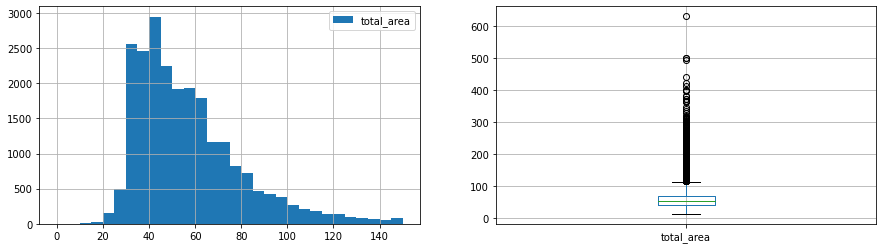

In [86]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
data['total_area'].hist(bins=30, range=(0,150),legend='total_area', ax=axs[0])
data.boxplot(column='total_area', grid=True, ax=axs[1])

Изучив диаграммы можно сделать вывод:  
Значения выше 400 встречаются редко и похожи на выбросы, так что избавимся от них.

In [87]:
data = data.query('total_area <= 400').reset_index(drop=True)

In [88]:
data['total_area'].describe()

count    23557.000000
mean        59.707194
std         31.852866
min         12.000000
25%         40.000000
50%         52.000000
75%         69.500000
max        400.000000
Name: total_area, dtype: float64

На московском рынке новостроек наиболее востребованный вариант квартир — классическая однокомнатная или двухкомнатная евроформата площадью до 50-60 квадратных метров и стоимостью до 11 миллионов рублей, следует из материалов агентства Est-a-Tet, предоставленных «Ленте.ру».

#### Столбец с информацией о жилой площади

In [89]:
data['living_area'].describe()

count    23557.000000
mean        35.343457
std         21.462850
min          2.000000
25%         19.000000
50%         30.900000
75%         43.100000
max        320.000000
Name: living_area, dtype: float64

<AxesSubplot:>

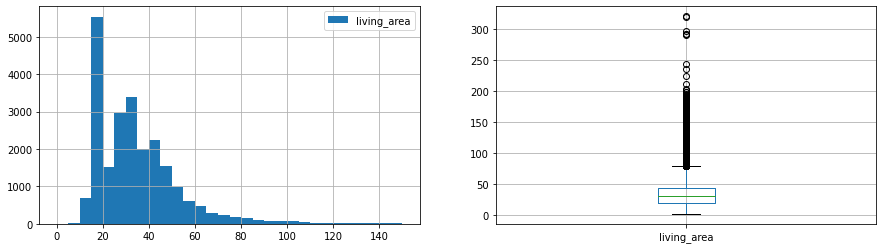

In [90]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
data['living_area'].hist(bins=30, range=(0,150),legend='living_area', ax=axs[0])
data.boxplot(column='living_area', grid=True, ax=axs[1])

Квартиры свыше 120 м2 всречаются редко и выглядят как выбросы, отбросим их.

In [91]:
data = data.query('living_area <= 120').reset_index(drop=True)

In [92]:
#data['living_area'].describe()

Самые популярные квартиры находятся в районе 18м2.  
Чаще всего такие варианты рассматривают молодые семьи, которые не успели скопить на покупку квартиры, и иногородние студенты. Также комнаты пользуются интересом у семей, которые хотят разъехаться после развода. Иногда такая жилплощадь становится инвестицией или ее покупают с целью дальнейшего выкупа соседней комнаты. Это в разы дешевле, нежели приобретать всю квартиру целиком.

#### Столбец с информацией о площади кухни

In [93]:
data['kitchen_area'].describe()

count    23314.000000
mean         9.848897
std          5.520339
min          1.080000
25%          6.500000
50%          9.000000
75%         11.300000
max        107.000000
Name: kitchen_area, dtype: float64

<AxesSubplot:>

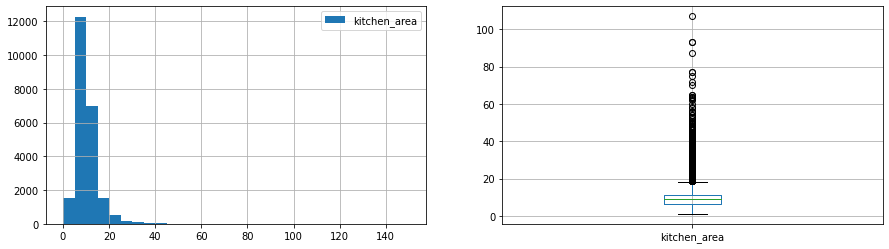

In [94]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
data['kitchen_area'].hist(bins=30, range=(0,150),legend='kitchen_area', ax=axs[0])
data.boxplot(column='kitchen_area', grid=True, ax=axs[1])

Кухни 50м2 и более выглядят как выбросы, избавимся от ниих.

In [95]:
data = data.query('kitchen_area <= 50').reset_index(drop=True)

In [96]:
data['kitchen_area'].describe()

count    23281.000000
mean         9.771259
std          5.098225
min          1.080000
25%          6.500000
50%          9.000000
75%         11.300000
max         50.000000
Name: kitchen_area, dtype: float64

Самые распространенные кухни находятся в районе 9м2.  
Кухню площадью 9 квадратных метров можно назвать средней по размеру. В ней достаточно места для всего самого необходимого: функционального гарнитура, бытовой техники и обеденной группы.

#### Столбец с информацией о цене объекта

In [97]:
data['last_price'].describe()

count    2.328100e+04
mean     5.941971e+06
std      5.958815e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.650000e+06
max      3.300000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

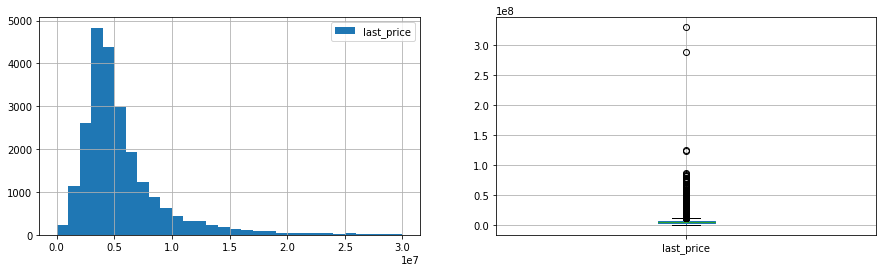

In [98]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
data['last_price'].hist(bins=30, range=(0,3e7),legend='last_price', ax=axs[0])
data.boxplot(column='last_price', grid=True, ax=axs[1])

Квартиры с стоимостью выше 25млн.руб. всетречаются редко и выглядят аномальными, отбросим эти значения.

In [99]:
data = data.query('last_price <= 50000000').reset_index(drop=True)

In [100]:
data['last_price'].describe()

count    2.324000e+04
mean     5.809640e+06
std      4.517077e+06
min      1.219000e+04
25%      3.400000e+06
50%      4.600000e+06
75%      6.600000e+06
max      5.000000e+07
Name: last_price, dtype: float64

Среднюю цену квартир по всем городам России «Мосленте» назвали специалисты федерального портала «Мир квартир». По их данным, цена составляет менее шести миллионов рублей, а именно от 3.5 до 5 млн.руб. Об этом сообщает "Рамблер". 

#### Столбец с информацией по количеству комнат

In [101]:
data['rooms'].describe()

count    23240.000000
mean         2.023021
std          0.978813
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: rooms, dtype: float64

<AxesSubplot:>

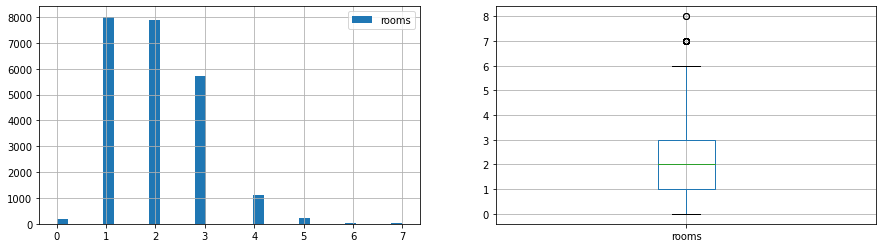

In [102]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
data['rooms'].hist(bins=30, range=(0, 7),legend='rooms', ax=axs[0])
data.boxplot(column='rooms', grid=True, ax=axs[1])

- Однокомнатные квартиры являются одним из наиболее востребованных видов недвижимости России. Причиной столь высокой популярности является дешевизна таких объектов. Несмотря на то, что стоимость «однушек» в абсолютном выражении практически не отличается от стоимости двухкомнатных квартир, ограниченные финансовые возможности большинства покупателей все же делают свое дело.   
- Двухкомнатные квартиры пользуются очень высоким спросом. Эксперты полагают, это потому, что квартиры с двумя комнатами подходят разным категориям жильцом. Они ценятся молодыми семьями и семьями с детьми, потому что позволяют выделить отдельно детскую. Они ценятся теми, кто живет со старшим поколением, и привлекают даже людей, которые любят жить в одиночестве.

#### Столбец с информацией о высоте потолков

In [103]:
data['ceiling_height'].describe()

count    23240.000000
mean         2.105938
std          0.317401
min          2.000000
25%          2.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

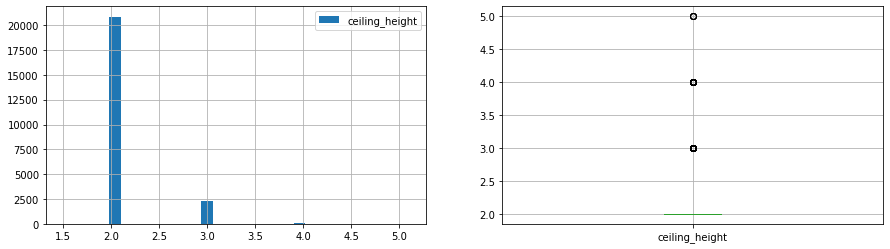

In [104]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
data['ceiling_height'].hist(bins=30, range=(1.50, 5.10),legend='ceiling_height', ax=axs[0])
data.boxplot(column='ceiling_height', grid=True, ax=axs[1])

Стандартные девятиэтажки. Значительная часть жилого фонда возводилась во времена Союза. Дома большей частью панельные, также есть кирпичные и блочные. Дома строились сериями, и высота потолков в панельном доме 9 этажей могла отличаться от серии к серии. Стандартом считается величина 2,10 м, но в некоторых сериях может быть 2,50-2,80 м.

#### Столбец с информацией о типе этажа квартиры

In [105]:
data['type_floor'].describe()

count      23240
unique         3
top       другой
freq       17122
Name: type_floor, dtype: object

<AxesSubplot:>

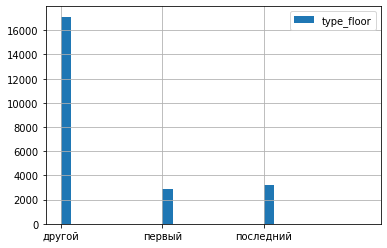

In [106]:
data['type_floor'].hist(bins=30, range=(0,3), legend='type_floor')

Проведя анализ опыта проживания можно прийти к таким выводам:

##### Что нам не нравится на первом этаже:

- Холодный пол и, как следствие, сырость в квартире. Не всегда и не везде данная проблема возникает, но с течением времени и отсутствием ремонта в подвале — может появиться или усугубиться. Решение — хорошая стяжка, утепление или система «Теплый пол».
- Слышимость всего что происходит на улице. Но от такой проблемы не застрахованы жильцы и второго и третьего этажей. Решение — окна с хорошим стеклопакетом. Однако летом это не решает данного вопроса, поэтому спасет только установка кондиционера.
- Насекомые и грызуны. Подвал является рассадником данной категории нарушителей спокойствия. Спасение можно найти в сетках на окна, репеллентах и обработке подвала инсектицидами.
- Проникновение посторонних через окно. Решение — хорошие решетки на окна и/или сигнализация.
- Отсутствие балкона. При возможности дополнительных вложений, пристрой балкона не является в наше время сложным процессом.  
С первым этажом разобрались, теперь переходим к разбору последнего.  
##### Что же там нас может ожидать:

- Прохудившаяся кровля. Очень неприятно, когда при малейшем дожде или таянии снега вода просачивается в квартиру. Поэтому следить за целостностью чердачных помещений и крыш нужно будет постоянно.
- Поломка лифта. Очень досадный минус, на который повлиять очень трудно, т. к. лифт не находится непосредственно в вашей квартире и повлиять на его работоспособность крайне сложно. Правда, если Вы проживаете в пятиэтажном доме на последнем этаже, то лифта вообще не будет. Поэтому Вам выбирать — нужна ли такая физическая подготовка.

#### Столбец с информацией по количесиву этажей в доме

In [107]:
data['floors_total'].describe()

count    23240.000000
mean        10.659165
std          6.566699
min          0.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         33.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

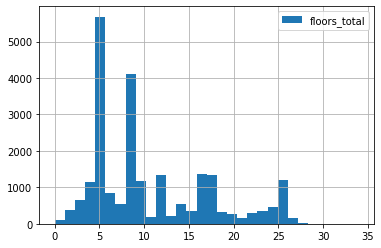

In [108]:
data['floors_total'].hist(bins=30, range=(0, 34), legend='floor')

Большинство объектов недвижимости размещены на 5 этаже.

#### Столбец с информацией по расстоянию до центра города в метрах

In [109]:
data['city_centers_nearest'].describe()

count    17749.000000
mean     14336.203279
std       8578.595882
min        181.000000
25%       9550.000000
50%      13189.000000
75%      16333.000000
max      65968.000000
Name: city_centers_nearest, dtype: float64

<AxesSubplot:>

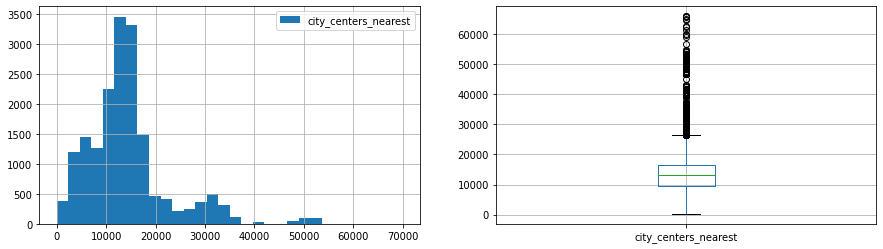

In [110]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
data['city_centers_nearest'].hist(bins=30, range=(0, 70000),legend='city_centers_nearest', ax=axs[0])
data.boxplot(column='city_centers_nearest', grid=True, ax=axs[1])

Ответ на вопрос о том, насколько далеко находится точка на расстоянии 15 км от центра города, зависит от многих факторов. Точнее определить, далеко или близко находится точка, поможет только учет всех факторов. Однако, общепринятым мнением является то, что 15 км достаточно близко к центру города, чтобы быть в шаговой доступности от основных достопримечательностей, но в то же время достаточно далеко, чтобы избежать проблем, связанных с городской суетой и шумом.

#### Столбец с информацией о расстоянии до ближайшего парка

In [111]:
data['parks_nearest'].describe()

count    7808.000000
mean      493.291368
std       344.107688
min         1.000000
25%       288.000000
50%       456.000000
75%       613.000000
max      3190.000000
Name: parks_nearest, dtype: float64

<AxesSubplot:>

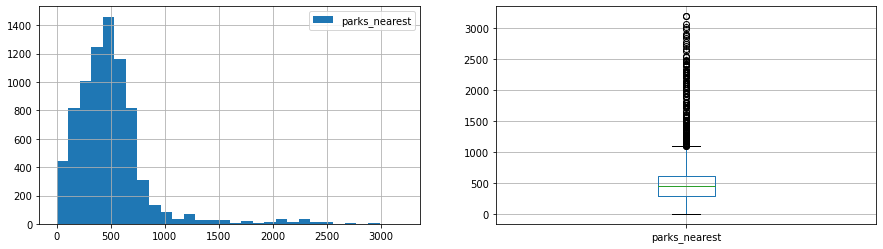

In [112]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
data['parks_nearest'].hist(bins=30, range=(0, 3200),legend='parks_nearest', ax=axs[0])
data.boxplot(column='parks_nearest', grid=True, ax=axs[1])

Средняя дальность до парка 500 метров.  
Парк рядом с домом — хорошая мотивация для активного образа жизни. Не нужно ехать в фитнес‑центр, потому что парк и есть готовая площадка для спорта. Летом здесь можно заниматься бегом, сайклингом, скейтингом, аэробикой, йогой, танцами, а зимой — кататься на лыжах. Более того, в современных парках часто проектируют не только беговые дорожки, но и полноценные площадки для спортивных тренировок — можно сэкономить на абонементе в зал.

#### Исследование, как быстро продавались квартиры

<AxesSubplot:>

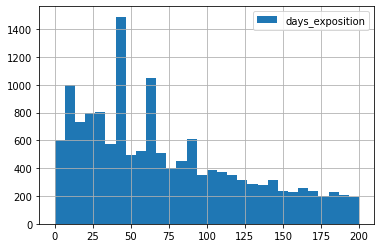

In [113]:
data['days_exposition'].hist(bins=30, range=(0, 200),legend='days_exposition')

In [114]:
data['days_exposition'].describe()

count    20155.000000
mean       179.005160
std        217.919552
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_exposition, dtype: float64

Минимальный срок продажи квартиры - 1 день, а самый долгий - 1580 дней( это более 4х лет). Среднее время продаж составляет - 178 дня, а медианное значение - 94 дней. Чаще всего объекты продавались на 45-50 день регистрации объявления.

In [115]:
data[data['days_exposition'] == 1.0]['locality_name']

1599    Санкт-Петербург
Name: locality_name, dtype: object

In [116]:
data[data['days_exposition'] == 1580.0]['locality_name']

18483    Новое Девяткино
Name: locality_name, dtype: object

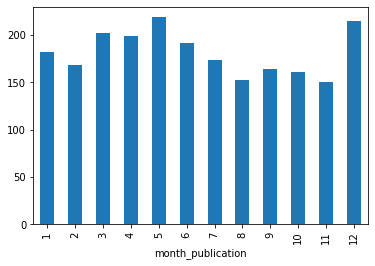

In [117]:
data.groupby('month_publication')['days_exposition'].mean().plot.bar()
plt.show()

Объявления которые были выставленны в ноябре быстрее всего нашли своего покупателя, а вот объявления в мае дольше всего находились у риэлторов.

#### Исследование, какие факторы больше всего влияют на общую (полную) стоимость объекта

##### Общая площадь

Построим диаграмму рассеяния:

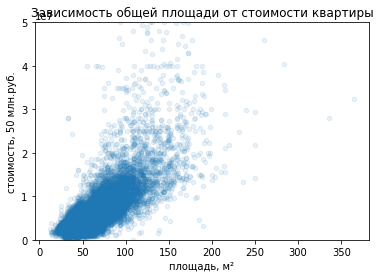

In [118]:
data.plot(x='total_area',
                 y ='last_price', 
                 kind ='scatter', 
                 figsize=(6, 4), 
                 legend=True, 
                 alpha = 0.1)

plt.title('Зависимость общей площади от стоимости квартиры')
plt.xlabel('площадь, м²')
plt.ylabel('стоимость, 50 млн.руб.')
plt.ylim(0, 50000000)
plt.show()

Построим диаграмму рассеяния с линией регрессии:

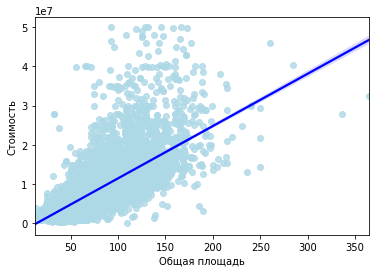

In [119]:
sns.regplot(
    x='total_area', 
    y='last_price', 
    data=data, scatter_kws={"color": "lightblue"}, line_kws={"color": "blue"})
plt.xlabel(
    'Общая площадь')
plt.ylabel(
    'Стоимость')
plt.show()

Из диаграммы видно что, чем больше площадь квартиры, тем выше ее цена.

Для оценки корреляции рассчитаем коэффициент Пирсона:

In [120]:
round(data['total_area'].corr(data['last_price']), 2)

0.76

##### Жилая площадь

Построим диаграмму рассеяния с линией регрессии:

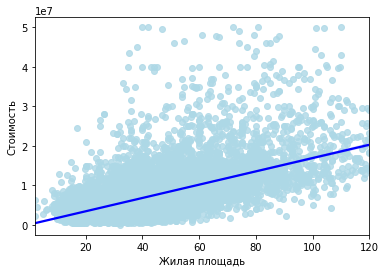

In [121]:
sns.regplot(
    x='living_area', 
    y='last_price', 
    data=data, scatter_kws={"color": "lightblue"}, line_kws={"color": "blue"})
plt.xlabel(
    'Жилая площадь')
plt.ylabel(
    'Стоимость')
plt.show()

Из диаграммы видно, что с ростом площади кухни растет и цена, однако рассчитанный коэффциент корреляции ниже, чем аналогичный коэффициент для общей площади.

Для оценки корреляции рассчитаем коэффициент Пирсона:

In [122]:
round(data['living_area'].corr(data['last_price']), 2)

0.64

Рассчитанный коэффциент корреляции ниже, чем аналогичный коэффициент для общей площади.

##### Площадь кухни

Построим диаграмму рассеяния с линией регрессии:

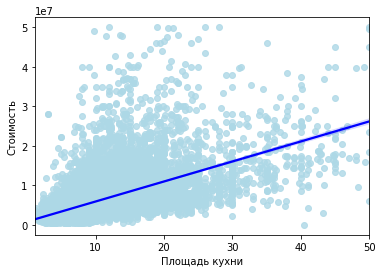

In [123]:
sns.regplot(
    x='kitchen_area', 
    y='last_price', 
    data=data, scatter_kws={"color": "lightblue"}, line_kws={"color": "blue"})
plt.xlabel(
    'Площадь кухни')
plt.ylabel(
    'Стоимость')
plt.show()

Из диаграммы видно что, чем выше площадь кухни, тем выше стоимость. Больше всего данных для квартир стоимостью до 20 млн. руб. и площадью кухни от 8 до 15 м2.

In [124]:
round(data['kitchen_area'].corr(data['last_price']), 2)

0.57

Рассчитанный коэффциент корреляции ниже, чем аналогичный коэффициент для общей площади. Но выще чем для жилой площади.

##### Количество комнат

Построим диаграмму рассеяния с линией регрессии:

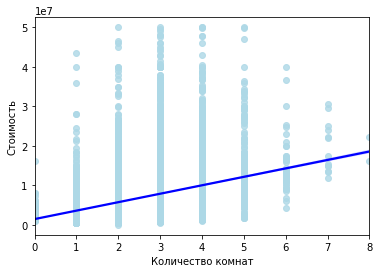

In [125]:
sns.regplot(
    x='rooms', 
    y='last_price', 
    data=data, scatter_kws={"color": "lightblue"}, line_kws={"color": "blue"})
plt.xlabel(
    'Количество комнат')
plt.ylabel(
    'Стоимость')
plt.show()

In [126]:
round(data['rooms'].corr(data['last_price']), 2)

0.46

Из диаграммы видно, чем больше комнат тем выше и цена, рассчитанный коэффциент корреляции ниже, чем коэффициент для общей площади. На объекты с количеством комнат - 3, наблюдается наибольший разброс цен.

##### Этажа, на котором расположена квартира (первый, последний, другой)

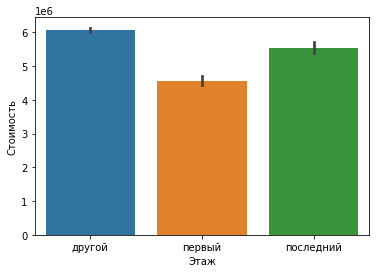

In [127]:
sns.barplot(
    x='type_floor', 
    y='last_price', 
    data=data)
plt.xlabel(
    'Этаж')
plt.ylabel(
    'Стоимость')
plt.show()

Из диаграммы видно, самая низкая цена на квартиры на первом этаже, чуть выше цена на последние этажи. А вот самая высокая цена на квартиры которые находят между первым и послденим этажом, с названием -  "другой".

#### Дата размещения (день недели, месяц, год)

##### День недели

Построим гистограмму и точечную диаграмму для большей наглядности:

Text(0, 0.5, 'Стоимость')

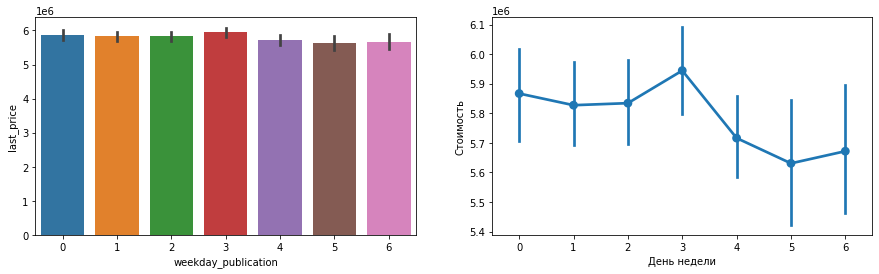

In [128]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.barplot(
    x='weekday_publication', 
    y='last_price', 
    data=data, ax=axs[0])
plt.xlabel(
    'День недели')
plt.ylabel(
    'Стоимость')

sns.pointplot(
    x='weekday_publication', 
    y='last_price', 
    data=data, ax=axs[1])
plt.xlabel(
    'День недели')
plt.ylabel(
    'Стоимость')

Из диаграммы видно, что дороже всего продавались квартиры, размещенные в объявлениях по четвергам.

##### Месяц

Построим гистограмму и точечную диаграмму для большей наглядности:

Text(0, 0.5, 'Стоимость')

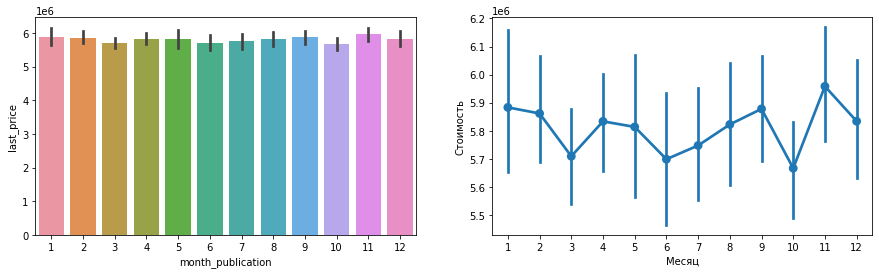

In [129]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.barplot(
    x='month_publication', 
    y='last_price', 
    data=data, ax=axs[0])
plt.xlabel(
    'Месяц')
plt.ylabel(
    'Стоимость')

sns.pointplot(
    x='month_publication', 
    y='last_price', 
    data=data, ax=axs[1])
plt.xlabel(
    'Месяц')
plt.ylabel(
    'Стоимость')

Из графиков видно что, объявления опубликованные в ноябре дороже всего продались, история с октябрем ровно наоборот, размещенные объявления в этом месяце дешевле всего продались.

##### Год

Построим гистограмму и точечную диаграмму для большей наглядности:

Text(0, 0.5, 'Стоимость')

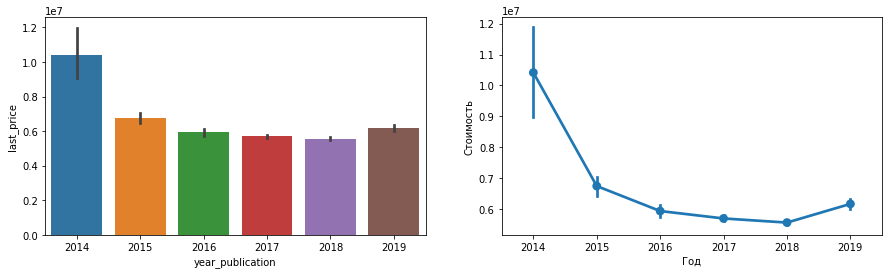

In [130]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.barplot(
    x='year_publication', 
    y='last_price', 
    data=data, ax=axs[0])
plt.xlabel(
    'Год')
plt.ylabel(
    'Стоимость')

sns.pointplot(
    x='year_publication', 
    y='last_price', 
    data=data, ax=axs[1])
plt.xlabel(
    'Год')
plt.ylabel(
    'Стоимость')

Из диаграмм видно что, продажи с самой высокой стоимость были в 2014 году, после чего пошли на спад до 2018 года, после чего цены вновь начали расти.

На уменьшение стоимости квартир могло повлиять уменьшение их площади. Проверим это предположение, проанализировав зависимость площади и цены квадратного метра от года размещения объявления:

Text(0, 0.5, 'Стоимость')

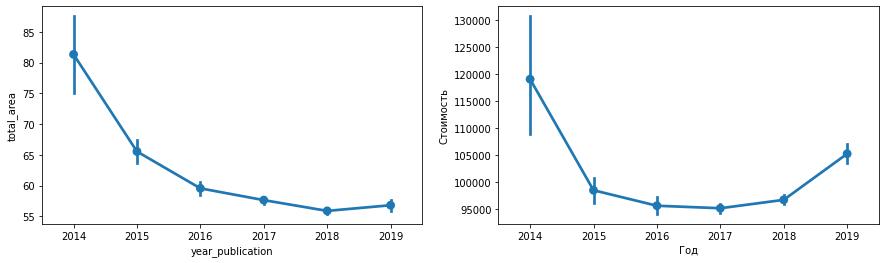

In [131]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.pointplot(
    x='year_publication', 
    y='total_area', 
    data=data, ax=axs[0])
plt.xlabel(
    'Год')
plt.ylabel(
    'Стоимость')

sns.pointplot(
    x='year_publication', 
    y='coast_quad_m', 
    data=data, ax=axs[1])
plt.xlabel(
    'Год')
plt.ylabel(
    'Стоимость')

Действительно, в 2018 г были минимальные площади продаваемых квартир, что обусловило и минимальные цены на объекты недвижимости. Проверив динамику стоимости квадратного метра, обнаружили, что в 2017- 2018 гг стоимость квадратного метра стала минимальной, после чего, вероятно, стало невыгодно продавать квартиры с большой площадью, и площадь продаваемых объектов в 2016 году упала до минимума.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений

In [132]:
# Создадим сводную таблицу
ten_local = data.pivot_table(index='locality_name', 
                             values='coast_quad_m', 
                             aggfunc=['count', 'median'])
ten_local.columns = ['count', 'median']
ten_local.sort_values('count', ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,15343,104458.600
Мурино,590,86175.640
Кудрово,471,95762.710
Шушары,440,76876.175
Всеволожск,396,65789.470
Пушкин,361,99744.250
Колпино,337,74722.220
Парголово,326,91780.225
Гатчина,307,67796.610


Из графика видно, что наибольшая средняя цена за 1 квадратный метр в Санкт-Петербурге(104458 руб.), что логично.  
Наименьшая цена за квадратный метр в Выборге(58307 руб.).

#### Вычислим среднюю цену каждого километра до центра в Санкт-Петербурге 

In [133]:
data_spb = data.query('locality_name == "Санкт-Петербург"')\
        .pivot_table(index='city_centr_km', values='coast_quad_m').round(2)
data_spb

,coast_quad_m
city_centr_km,
0.0,213818.81
1.0,146443.56
2.0,138935.53
3.0,118861.70
4.0,127733.71
5.0,135630.52
6.0,141716.69
7.0,140735.13
8.0,123829.01


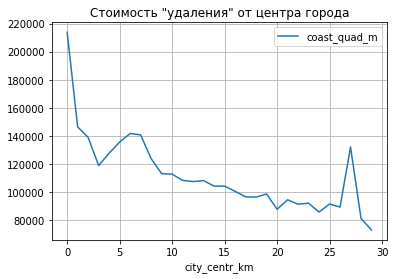

In [134]:
data_spb.plot(grid=True, title = 'Cтоимость "удаления" от центра города')
plt.show()

В целом с удалением от центра Санкт-Петербурга стоимость квадратного метра уменьшается. Однако на удаленности 6 км и 26 км от центра наблюдается рост цен квадратного метра, это может быть связано с нахождением там КАД или элитных жилых районов.

### Вывод

- C удалением от центра Санкт-Петербурга стоимость квадратного метра уменьшается. Однако в тех местах где есть развитая инфраструктура наблюдается и рост цен.
- Наибольшая цена за квадратный метр наблюдается в Санкт-Петербурге, самая маленькая цена в Выборге.
- Продажи с самой высокой стоимость были в 2014 году, после чего пошли на спад до 2018 года, после чего цены вновь начали расти. В 2018 г были минимальные площади продаваемых квартир, что обусловило и минимальные цены на объекты недвижимости. Проверив динамику стоимости квадратного метра, обнаружили, что в 2017- 2018 гг стоимость квадратного метра стала минимальной, после чего, вероятно, стало невыгодно продавать квартиры с большой площадью, и площадь продаваемых объектов в 2016 году упала до минимума.
- Объявления опубликованные в ноябре дороже всего продались, история с октябрем ровно наоборот, размещенные объявления в этом месяце дешевле всего продались.
- Дороже всего продавались квартиры, размещенные в объявлениях по четвергам.
- Самая низкая цена на квартиры на первом этаже, чуть выше цена на последние этажи. А вот самая высокая цена на квартиры, которые находят между первым и послденим этажом.
- Чем больше комнат тем, выше и цена.
- Чем выше площадь кухни, тем выше стоимость. Больше всего данных для квартир стоимостью до 20 млн. руб. и площадью кухни от 8 до 15 м2.
- Чем больше площадь квартиры, тем выше ее цена.
- Минимальный срок продажи квартиры - 1 день, а самый долгий - 1580 дней( это более 4х лет). Среднее время продаж составляет - 178 дня, а медианное значение - 94 дней. Чаще всего объекты продавались на 45-50 день регистрации объявления.
- Однокомнатные квартиры являются одним из наиболее востребованных видов недвижимости России. Причиной столь высокой популярности является дешевизна таких объектов. Несмотря на то, что стоимость «однушек» в абсолютном выражении практически не отличается от стоимости двухкомнатных квартир, ограниченные финансовые возможности большинства покупателей все же делают свое дело.
- Двухкомнатные квартиры пользуются очень высоким спросом. Эксперты полагают, это потому, что квартиры с двумя комнатами подходят разным категориям жильцом. Они ценятся молодыми семьями и семьями с детьми, потому что позволяют выделить отдельно детскую. Они ценятся теми, кто живет со старшим поколением, и привлекают даже людей, которые любят жить в одиночестве.
- Самые популярные квартиры находятся в районе 18м2. Чаще всего такие варианты рассматривают молодые семьи, которые не успели скопить на покупку квартиры, и иногородние студенты. Также комнаты пользуются интересом у семей, которые хотят разъехаться после развода. Иногда такая жилплощадь становится инвестицией или ее покупают с целью дальнейшего выкупа соседней комнаты. Это в разы дешевле, нежели приобретать всю квартиру целиком.
- Самые распространенные кухни - Это кухни площадью в районе 9м2. Кухню площадью 9 квадратных метров можно назвать средней по размеру. В ней достаточно места для всего самого необходимого: функционального гарнитура, бытовой техники и обеденной группы.
#### Как можно дополнить анализ и сделать его более глубоким.
Для того чтобы улучшить продажи квартир нужно понимать свою целевую аудиторию.  Родители покупают квартиру, чтобы дать возможность детям жить отдельно, а дети — чтобы отселиться самим или, наоборот, перевезти родителей поближе, в таких случаях подойдет однокомнатная квартира либо двухкомнатная.
Чем больше детей — тем больше комнат выбирают покупатели.
Респонденты в возрасте от 18 до 24 лет чаще покупают квартиры на раннем и позднем этапе строительства ради экономии они готовы ждать, когда дом сдадут в эксплуатацию. После 55 лет охотнее выбирают жильё, в которое можно заехать сразу после покупки, например, на вторичном рынке.
Родители нескольких детей предпочитают не рисковать и не ждать — они чаще покупают квартиры в уже сданных новостройках и на вторичном рынке.
Таким образом, для более успешного продвижения рекламы квартир нужно ее показывать на сайтах которые чаще посещают те или иные категории потенциальных покупателей.
Для более глубоко анализа продаж квартир, неплохо было бы собрать дополнительные характеристики покупателей и объекта продажи:
-замужем/не замужем/в разводе.
-количество детей в семье.
-возрастная категория
-ремонт/без ремонта
-вторичка/новостройка
-наличие продуктовых магазинов/аптеки/парковочные места/кафе, рестораны, бары
-школы/садики/детские кружки

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод